<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

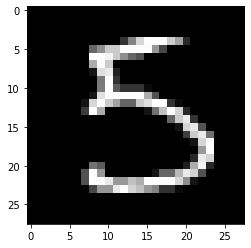

In [ ]:
plt.imshow(X_test[15], cmap='gray')

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

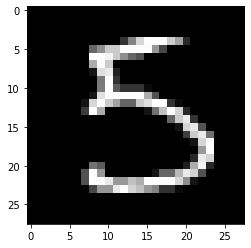

In [ ]:
plt.imshow(X_test[15], cmap='gray')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9252 - val_loss: 0.1044 - val_accuracy: 0.9682
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1179 - accuracy: 0.9642 - val_loss: 0.0864 - val_accuracy: 0.9719
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0895 - accuracy: 0.9724 - val_loss: 0.0735 - val_accuracy: 0.9763
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9763 - val_loss: 0.0712 - val_accuracy: 0.9773
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9797 - val_loss: 0.0792 - val_accuracy: 0.9768
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.0841 - val_accuracy:

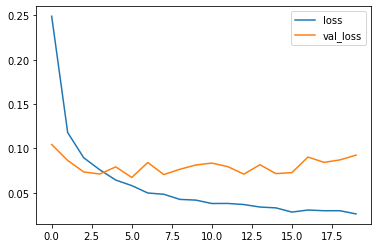

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

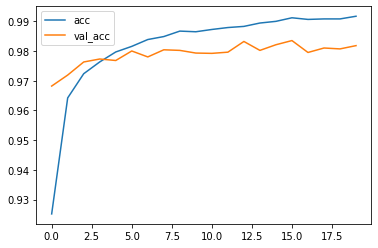

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 972    1    1    0    1    1    2    1    0    1]
 [   0 1126    1    1    0    0    3    0    4    0]
 [   5    1 1005    3    1    0    6    8    3    0]
 [   0    0    4  994    0    3    0    4    3    2]
 [   2    0    1    1  963    0    7    0    1    7]
 [   2    0    0    5    1  867   10    0    5    2]
 [   2    1    0    1    2    3  947    0    2    0]
 [   2    1    7    2    1    0    0 1008    2    5]
 [   3    0    2    4    1    2    2    3  953    4]
 [   3    3    0    3   10    2    0    1    4  983]]


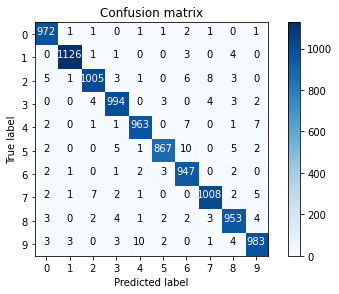

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
np.where(p_test != y_test)[0]

array([   8,  151,  247,  321,  340,  359,  381,  445,  448,  449,  495,
        582,  610,  619,  646,  659,  720,  740,  882,  924,  956, 1014,
       1039, 1044, 1112, 1128, 1156, 1178, 1224, 1226, 1232, 1242, 1247,
       1260, 1319, 1328, 1337, 1378, 1393, 1522, 1530, 1549, 1553, 1641,
       1681, 1790, 1813, 1901, 1911, 1941, 1982, 2004, 2016, 2024, 2029,
       2035, 2053, 2073, 2098, 2130, 2272, 2293, 2326, 2369, 2387, 2422,
       2462, 2488, 2597, 2654, 2720, 2743, 2758, 2921, 2927, 2939, 2953,
       3030, 3073, 3115, 3225, 3289, 3384, 3405, 3475, 3503, 3520, 3534,
       3558, 3559, 3565, 3597, 3604, 3702, 3767, 3780, 3808, 3811, 3853,
       3869, 3893, 3906, 3941, 3943, 3985, 4000, 4007, 4065, 4078, 4140,
       4163, 4176, 4199, 4248, 4289, 4425, 4437, 4443, 4497, 4500, 4504,
       4548, 4571, 4731, 4751, 4761, 4807, 4823, 4879, 4880, 4915, 5331,
       5586, 5642, 5676, 5757, 5887, 5936, 5955, 5973, 6011, 6390, 6391,
       6532, 6555, 6572, 6574, 6597, 6625, 6651, 67

Text(0.5, 1.0, 'True label: 3 Predicted: 2')

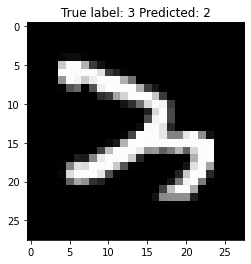

In [ ]:
i = np.random.choice( np.where(p_test != y_test)[0] )
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))